In [2]:
import numpy as np
import pandas as pd

In [74]:
data_2019 = pd.read_csv("KC_MRFN_LSR_ACT_SURVEY_INFO_2019.csv", sep=',')
data_2020 = pd.read_csv("KC_MRFN_LSR_ACT_SURVEY_INFO_2020.csv", sep=',')
data_2021 = pd.read_csv("KC_MRFN_LSR_ACT_SURVEY_INFO_2021.csv", sep=',')
data_2022 = pd.read_csv("KC_MRFN_LSR_ACT_SURVEY_INFO_2022.csv", sep=',')

In [75]:
data_2019['year'] = 2019
data_2020['year'] = 2020
data_2021['year'] = 2021
data_2022['year'] = 2022

In [82]:
data = pd.concat([data_2019, data_2020, data_2021, data_2022])
data.head(3)

,AREA_NM,TY_ACCTO_CLTUR_ART_VIEWNG_ACT_CO,TY_ACCTO_CLTUR_ART_PARTCPTN_ACT_CO,TY_ACCTO_SPORTS_VIEWNG_ACT_CO,TY_ACCTO_SPORTS_PARTCPTN_ACT_CO,TY_ACCTO_VIEWNG_ACT_CO,TY_ACCTO_HOBBY_RCRT_ACT_CO,TY_ACCTO_REST_ACT_CO,TY_ACCTO_SCT_ND_ETC_ACT_CO,INDVDL_TV_WTCHNG_CO,...,INDVDL_ETC_LSR_ACT_CO,INDVDL_MUSEUM_VIEWNG_CO,INDVDL_DMSTC_CAMPING_ACT_CO,INDVDL_AREA_FSTVL_PARTCPT_CO,INDVDL_GROUP_ACT_CO,INDVDL_TRDIT_ART_PBLPRFR_VIEWNG_CO,INDVDL_TOUR_SHIP_BRDNG_CO,INDVDL_OVSEA_TOUR_CO,INDVDL_LTRTR_EVENT_PARTCPTN_CO,year
0,서울,0.3,0.5,3.3,6.1,0.4,28.9,53.9,6.6,38.3,...,-,-,0.2,-,-,0.0,-,-,0.2,2019
1,부산,0.2,0.3,0.6,7.4,0.1,23.9,62.8,4.8,54.7,...,-,-,0.3,0.2,-,-,-,-,0.1,2019
2,대구,-,0.8,0.7,3.1,0.7,25.1,67.0,2.7,55.5,...,-,-,-,-,-,-,-,0.2,-,2019


In [83]:
columns = pd.read_excel("국민여가활동조사 통계 데이터_컬럼정의서.xls")

In [84]:
columns = columns.set_index("컬럼영문명")

In [94]:
columns_korean = []
for column_name in data.columns[:-1]:
    columns_korean.append(columns.loc[column_name]['컬럼한글명'])
columns_korean.append('연도')

In [96]:
data.columns = columns_korean

In [109]:
seoul = data[data['지역명'] == '서울']

In [114]:
seoul = seoul.set_index('연도')

In [149]:
seoul.head(2)

,유형별문화예술관람활동수,유형별문화예술참여활동수,유형별스포츠관람활동수,유형별스포츠참여활동수,유형별관람활동수,유형별취미오락활동수,유형별휴식활동수,유형별사회및기타활동수,개인TV시청수,개인인터넷활동수,...,개인테마파크놀이공원동물원식물원방문수,개인기타레저활동수,개인박물관관람수,개인국내캠핑활동수,개인지역축제참가수,개인그룹활동수,개인전통예술공연관람수,개인여행배탑승수,개인해외여행수,개인문학행사참여수
연도,,,,,,,,,,,,,,,,,,,,,
2019,0.3,0.5,3.3,6.1,0.4,28.9,53.9,6.6,38.3,18.9,...,-,-,-,0.2,-,-,0.0,-,-,0.2
2020,4.1,1.1,2.1,12.1,1.8,22.3,50.3,6.3,29.7,5.5,...,0.4,0.1,0.2,0.6,0.1,0.3,NaN,NaN,0.0,NaN


In [148]:
del seoul['지역명'] 

In [151]:
seoul = seoul.fillna(0)

In [153]:
seoul = seoul.replace('-', 0)

In [156]:
seoul = seoul.astype('float')

In [157]:
seoul

,유형별문화예술관람활동수,유형별문화예술참여활동수,유형별스포츠관람활동수,유형별스포츠참여활동수,유형별관람활동수,유형별취미오락활동수,유형별휴식활동수,유형별사회및기타활동수,개인TV시청수,개인인터넷활동수,...,개인테마파크놀이공원동물원식물원방문수,개인기타레저활동수,개인박물관관람수,개인국내캠핑활동수,개인지역축제참가수,개인그룹활동수,개인전통예술공연관람수,개인여행배탑승수,개인해외여행수,개인문학행사참여수
연도,,,,,,,,,,,,,,,,,,,,,
2019,0.3,0.5,3.3,6.1,0.4,28.9,53.9,6.6,38.3,18.9,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2
2020,4.1,1.1,2.1,12.1,1.8,22.3,50.3,6.3,29.7,5.5,...,0.4,0.1,0.2,0.6,0.1,0.3,0.0,0.0,0.0,0.0
2021,80.9,20.0,59.6,84.7,185.6,379.0,395.0,257.9,88.0,52.0,...,14.5,2.0,6.0,27.8,6.3,13.4,1.6,1.8,10.4,1.0
2022,80.2,24.7,54.1,80.7,157.2,336.2,341.6,222.0,80.6,45.3,...,15.9,0.8,6.3,17.2,10.4,18.4,1.4,2.6,4.5,1.4


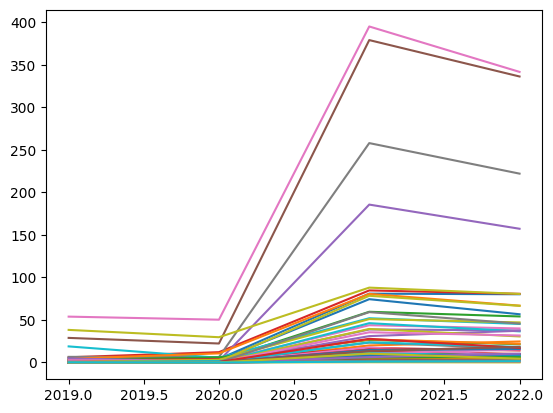

In [158]:
import matplotlib.pyplot as plt

plt.plot(seoul)

In [159]:
seoul

,유형별문화예술관람활동수,유형별문화예술참여활동수,유형별스포츠관람활동수,유형별스포츠참여활동수,유형별관람활동수,유형별취미오락활동수,유형별휴식활동수,유형별사회및기타활동수,개인TV시청수,개인인터넷활동수,...,개인테마파크놀이공원동물원식물원방문수,개인기타레저활동수,개인박물관관람수,개인국내캠핑활동수,개인지역축제참가수,개인그룹활동수,개인전통예술공연관람수,개인여행배탑승수,개인해외여행수,개인문학행사참여수
연도,,,,,,,,,,,,,,,,,,,,,
2019,0.3,0.5,3.3,6.1,0.4,28.9,53.9,6.6,38.3,18.9,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2
2020,4.1,1.1,2.1,12.1,1.8,22.3,50.3,6.3,29.7,5.5,...,0.4,0.1,0.2,0.6,0.1,0.3,0.0,0.0,0.0,0.0
2021,80.9,20.0,59.6,84.7,185.6,379.0,395.0,257.9,88.0,52.0,...,14.5,2.0,6.0,27.8,6.3,13.4,1.6,1.8,10.4,1.0
2022,80.2,24.7,54.1,80.7,157.2,336.2,341.6,222.0,80.6,45.3,...,15.9,0.8,6.3,17.2,10.4,18.4,1.4,2.6,4.5,1.4


In [145]:
seoul

,지역명,유형별문화예술관람활동수,유형별문화예술참여활동수,유형별스포츠관람활동수,유형별스포츠참여활동수,유형별관람활동수,유형별취미오락활동수,유형별휴식활동수,유형별사회및기타활동수,개인TV시청수,...,개인테마파크놀이공원동물원식물원방문수,개인기타레저활동수,개인박물관관람수,개인국내캠핑활동수,개인지역축제참가수,개인그룹활동수,개인전통예술공연관람수,개인여행배탑승수,개인해외여행수,개인문학행사참여수
연도,,,,,,,,,,,,,,,,,,,,,
2019,서울,0.3,0.5,3.3,6.1,0.4,28.9,53.9,6.6,38.3,...,-,-,-,0.2,-,-,0.0,-,-,0.2
2020,서울,4.1,1.1,2.1,12.1,1.8,22.3,50.3,6.3,29.7,...,0.4,0.1,0.2,0.6,0.1,0.3,NaN,NaN,0.0,NaN
2021,서울,80.9,20.0,59.6,84.7,185.6,379.0,395.0,257.9,88.0,...,14.5,2.0,6.0,27.8,6.3,13.4,1.6,1.8,10.4,1.0
2022,서울,80.2,24.7,54.1,80.7,157.2,336.2,341.6,222.0,80.6,...,15.9,0.8,6.3,17.2,10.4,18.4,1.4,2.6,4.5,1.4
